In [1]:
import swarms
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('paper')
from swarms import MMOON, MJUP, RJUP, AU, REARTH, MEARTH, PC, MSUN, LSUN, YEAR, MICRON

In [47]:
%%time

Dc = 1e5 # m
rho = 1000 # kg/m^3
eta = 0.3 # eta
Dt = 100 # m
fQ = 5
age = 30*1e6*YEAR
        
star = swarms.Star(LSUN, MSUN, 5780, d=30*PC)
NM0 = 4
Na = 100
M0s = np.logspace(0, -6, NM0)*MEARTH#[0.1, 0.01, 0.001, 0.0001]
avals = np.logspace(np.log10(5), np.log10(500), Na)*AU
M = np.zeros((NM0, Na))
aopt = np.zeros(NM0)
for i, M0 in enumerate(M0s):    
    for j, a in enumerate(avals):
        planet = swarms.Planet(star, M=MJUP , a=a)
        swarm = swarms.CollSwarm(star, planet, M0=M0, Dt=Dt, Dmax=Dc, eta=eta, rho=rho, fQ=fQ, age=age)
        M[i][j] = swarm.computeMtot()/MEARTH
        aopt[i] = swarm.computeaopt(age)

CPU times: user 7.34 s, sys: 504 ms, total: 7.84 s
Wall time: 7.84 s


/Users/dtamayo/miniconda3/envs/p3/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


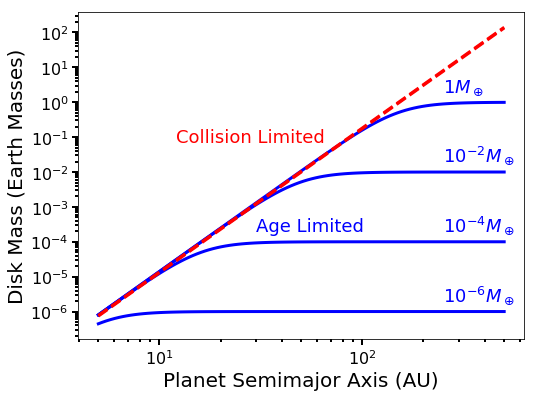

In [66]:
fig, ax = plt.subplots(figsize=(8,6))

for i, M0 in enumerate(M0s):
    ax.loglog(avals/AU, M[i,:], c='b', label=r"${0} M_\oplus$".format(M0))
    
approx = M0s[0]/MEARTH*(avals/aopt[0])**4.13
ax.loglog(avals/AU, approx, 'r--')
ax.loglog(avals/AU, approx1, 'r--')
ax.text(12, 7.e-2, "Collision Limited", color='r', fontsize=18)
ax.text(30, 2e-4, "Age Limited", color='b', fontsize=18)
ax.text(250, 2, r"$1 M_\oplus$", color='b', fontsize=18)
ax.text(250, 2e-2, r"$10^{-2} M_\oplus$", color='b', fontsize=18)
ax.text(250, 2e-4, r"$10^{-4} M_\oplus$", color='b', fontsize=18)
ax.text(250, 2e-6, r"$10^{-6} M_\oplus$", color='b', fontsize=18)
#ax.text(1.1e7, 5.5e-3, "$M_{max}(10 Myr)$", color='r', fontsize=18)
#ax.scatter(1.e7, 4.e-3, c='r', s=200)

ax.set_xlabel('Planet Semimajor Axis (AU)')
ax.set_ylabel('Disk Mass (Earth Masses)')
fig.savefig('massvsseparation.pdf', bbox_inches='tight')

In [41]:
age = 10*1e6*YEAR
planet = swarms.Planet(star, M=MJUP , a=100*AU)
swarm = swarms.CollSwarm(star, planet, M0=M0, Dt=Dt, Dmax=Dc, eta=eta, rho=rho, fQ=fQ, age=age)

In [42]:
swarm.computeaopt(age)/AU

89.73373814145148

In [43]:
swarm.Rcc0*swarm.age

1.7530736633548354

In [44]:
swarm.computeMtot()/MEARTH

0.36323038257589585